# Machine Learning Halo Finder

In [1]:
import pynbody as pb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
s=pb.load('test_grafic++.02000')
s.physical_units()

In [250]:
h=s.halos()

In [3]:
print s.d['mass'][0]
mtot = s['mass'].sum()

4959519.01631


<IPython.core.display.Javascript object>


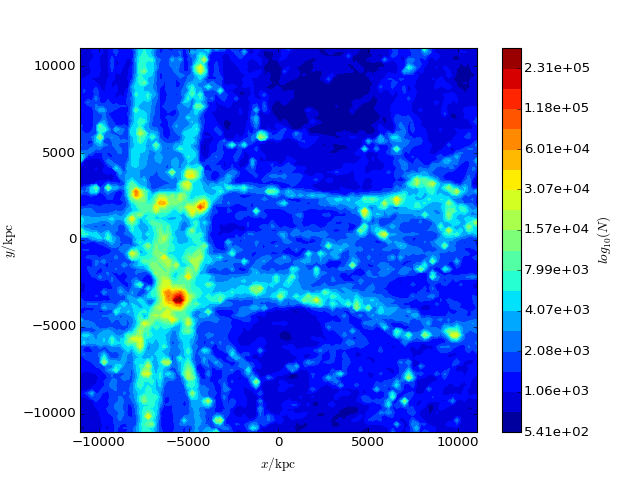

In [4]:
plt.figure()
hg = pb.plot.hist2d(s.d['x'], s.d['y'], colorbar=True)

<IPython.core.display.Javascript object>


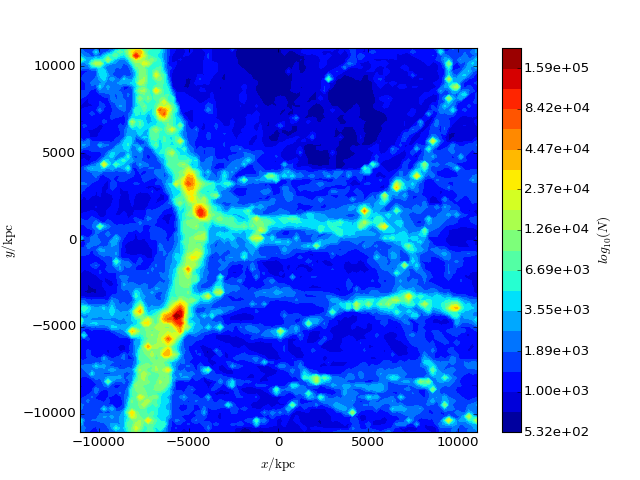

In [5]:
plt.figure()
p=pb.plot.hist2d(s.d['x'], s.d['z'], colorbar=True)

In [29]:
d=2300
f=pb.filt.BandPass('x', str(-d)+' kpc', str(d)+' kpc')&pb.filt.BandPass('y', str(-d)+' kpc', str(d)+' kpc') & pb.filt.BandPass('z', str(-d)+' kpc', str(d)+' kpc')

In [30]:
len(s[f])

222555

<IPython.core.display.Javascript object>


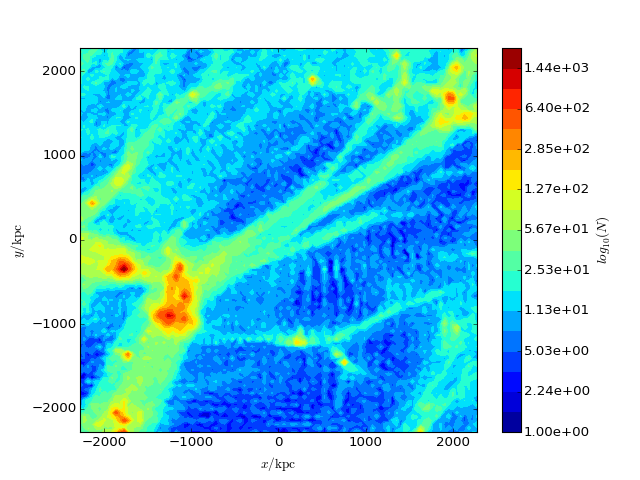

In [480]:
plt.figure()
h = pb.plot.hist2d(s[f].d['y'], s[f].d['z'], colorbar=True)

In [92]:
data=s.d[f]
subdata = np.array([data['x'],data['y'],data['z']])

<bound method IndexedSubSnap.get_index_list of <SimSnap "test_grafic++.02000::dm:bandpass_x&bandpass_y&bandpass_z" len=222555>>


<IPython.core.display.Javascript object>


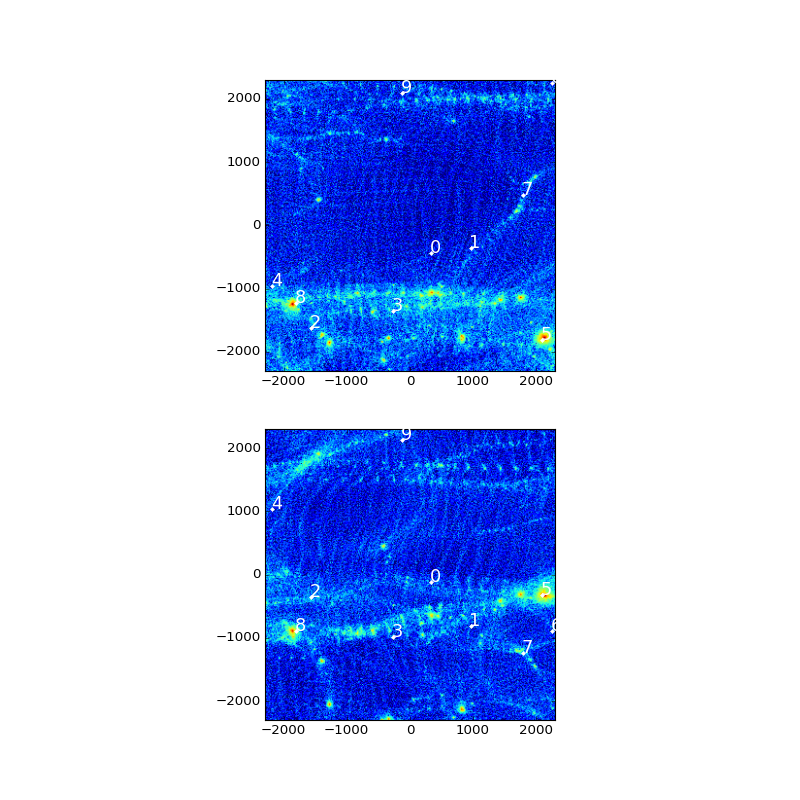

array([104520,  62185, 109827,  34712, 195252, 147143,  33330,  30467,
        92392, 191929])


In [277]:
plt.close('all')
from matplotlib.widgets import Slider, Button, RadioButtons

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(211)
ax2=fig.add_subplot(212)
H, b, e=np.histogram2d(subdata[0], subdata[1], bins=300)
G, b, e=np.histogram2d(subdata[0], subdata[2], bins=300)
ax.imshow(np.log10(H.T+1), origin='lower', extent=(-d, d, -d, d))
ax2.imshow(np.log10(G.T+1), origin='lower', extent=(-d, d, -d, d))
ax.set_xlim(-d, d)
ax.set_ylim(-d, d)
ax2.set_xlim(-d, d)
ax2.set_ylim(-d, d)

ind=np.array(np.random.random(10)*len(subdata[0]), dtype='int')
print repr(ind)
for p in range(10):
    xp, yp, zp = subdata[0][ind], subdata[1][ind], subdata[2][ind]
    ax.plot(xp[p],yp[p],marker='.',color='w')
    ax.text(xp[p],yp[p],str(p),size=16,color='w')
    ax2.plot(xp[p],zp[p],marker='.',color='w')
    ax2.text(xp[p],zp[p],str(p),size=16,color='w')


In [169]:
# void = 0, filament = 1, halo = 2
train_class = [1,2,1, 2,1,0,1,1, 0,1, 2,1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0, 2,2, 1]
train_ind = [222302,66250 ,126701 ,118113 , 57768 , 79664 ,152720 , 30732, 131215 , 32862, 59165 ,123622 ,158104 , 75093 , 58209 ,173018, 126477, 139393 , 44318 ,177947, 126922,  69881,  10218,  62286,  62323, 176011,  84562, 105399,
        53284, 189209]

In [603]:
np.bincount(train_class) / 30.

array([ 0.2       ,  0.56666667,  0.23333333])

In [481]:
subdata.shape

(3, 222555)

In [567]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=20, algorithm='ball_tree').fit(subdata.T)
distances, indices = nbrs.kneighbors(subdata.T)

array([[   0.        ,  106.28131437,  111.36315948, ...,  211.10069944,
         211.31918575,  215.91912511],
       [   0.        ,   79.42895516,   79.99552854, ...,  223.00847814,
         226.90699807,  233.99285758],
       [   0.        ,   79.99552854,   84.56070112, ...,  186.7628894 ,
         203.86695464,  209.30161403],
       ..., 
       [   0.        ,   28.79533726,   33.23009661, ...,   84.84592201,
          90.33062979,  105.8640808 ],
       [   0.        ,   10.51752173,   17.23279401, ...,   87.58217862,
          89.22329814,   90.82893261],
       [   0.        ,   21.49227215,   23.36888765, ...,   92.70398255,
          95.25857457,   97.68954494]])

In [607]:
dist20=abs(subdata-subdata[:,indices.T[-1]])
diff20 = dist20.max(axis=0)-dist20.min(axis=0)
dist10=abs(subdata-subdata[:,indices.T[9]])
diff10 = dist10.max(axis=0)-dist10.min(axis=0)
dist5=abs(subdata-subdata[:,indices.T[4]])
diff5 = dist5.max(axis=0)-dist5.min(axis=0)

In [608]:
features=[s[f].d['rho'], s[f].d['v_disp'], diff5, diff10, diff20]

<IPython.core.display.Javascript object>


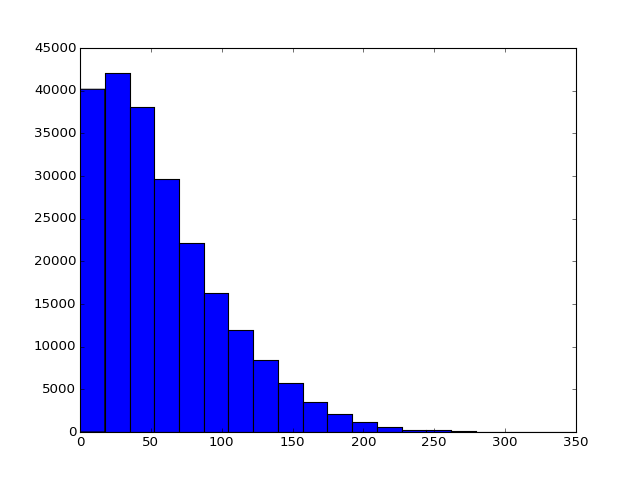

(array([  4.01620000e+04,   4.20310000e+04,   3.80330000e+04,
          2.96450000e+04,   2.21820000e+04,   1.62820000e+04,
          1.19960000e+04,   8.47000000e+03,   5.70000000e+03,
          3.56100000e+03,   2.09800000e+03,   1.21100000e+03,
          6.00000000e+02,   2.84000000e+02,   1.85000000e+02,
          6.40000000e+01,   2.60000000e+01,   1.40000000e+01,
          8.00000000e+00,   3.00000000e+00]),
 array([  2.32102071e-02,   1.74764429e+01,   3.49296755e+01,
          5.23829082e+01,   6.98361409e+01,   8.72893735e+01,
          1.04742606e+02,   1.22195839e+02,   1.39649072e+02,
          1.57102304e+02,   1.74555537e+02,   1.92008770e+02,
          2.09462002e+02,   2.26915235e+02,   2.44368467e+02,
          2.61821700e+02,   2.79274933e+02,   2.96728165e+02,
          3.14181398e+02,   3.31634631e+02,   3.49087863e+02]),
 <a list of 20 Patch objects>)

In [622]:
plt.figure()
plt.hist(diff20, bins=20)

In [609]:
len(features)

5

In [610]:
features=np.array(features).T

In [611]:
X_train = features[train_ind]
y_train = train_class

#print y_train
#print X_train

from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

grid = GridSearchCV(GradientBoostingClassifier(), 
                    {"n_estimators": [10, 50, 100],
                     "learning_rate": [0.0001, 0.001, 0.01, 0.1],
                     "max_leaf_nodes": [2, 4, 8, 16]}, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'max_leaf_nodes': [2, 4, 8, 16], 'learning_rate': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [556]:
grid.best_estimator_

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=2,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

<IPython.core.display.Javascript object>


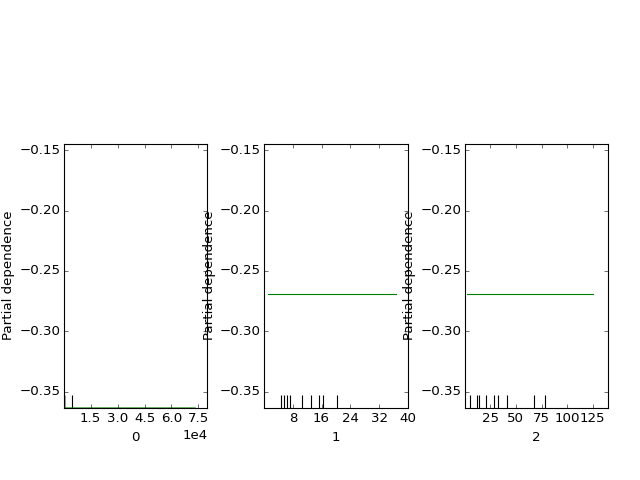

[ 0.11        0.16333333  0.23        0.46        0.03666667]


In [612]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

plot_partial_dependence(grid.best_estimator_, X_train, [0, 1, 2], label=0)
print grid.best_estimator_.feature_importances_

In [613]:
rf = grid.best_estimator_

rf_preds = rf.predict(features)
rf_predprob = rf.predict_proba(features)

Importance of features:

In [614]:
rf.feature_importances_

array([ 0.11      ,  0.16333333,  0.23      ,  0.46      ,  0.03666667])

In [615]:
print 1. * sum(rf_preds == 0)/len(rf_preds)
print 1. * sum(rf_preds == 1)/len(rf_preds)
print 1. * sum(rf_preds == 2)/len(rf_preds)

0.128853541821
0.653231785401
0.217914672778


<IPython.core.display.Javascript object>


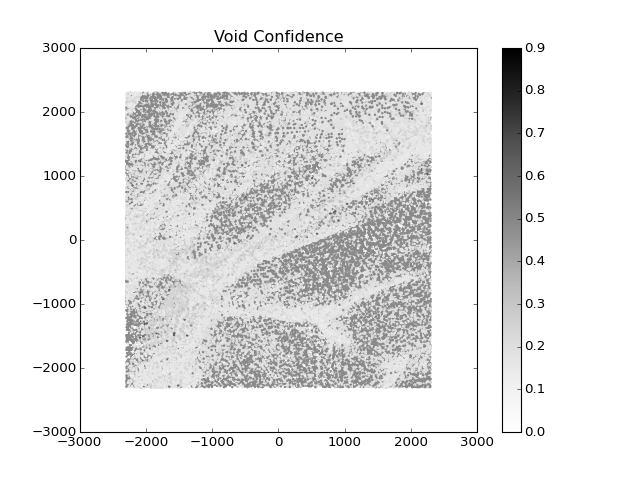

In [616]:
plt.figure()
#v = pb.plot.hist2d(s[f].d['y'], s[f].d['z'])
v = 0
plt.scatter(s[f].d['y'], s[f].d['z'], edgecolor="None", c=rf_predprob[:,v], marker='.', vmin=0, vmax=0.9)
plt.colorbar()
plt.set_cmap("Greys")
plt.title('Void Confidence')

<IPython.core.display.Javascript object>


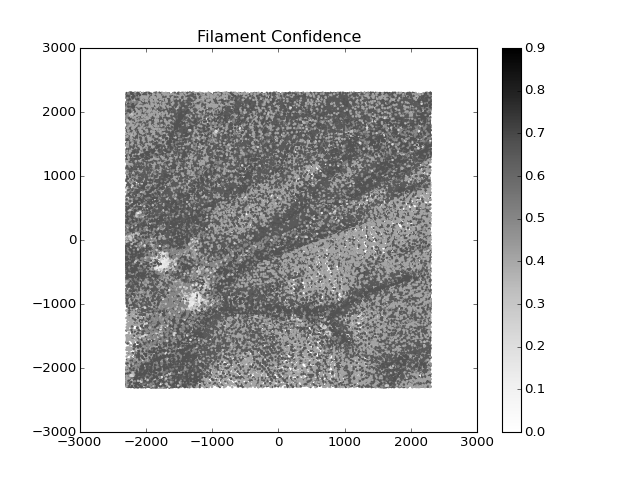

In [617]:
plt.figure()
#v = pb.plot.hist2d(s[f].d['y'], s[f].d['z'])
v = 1
plt.scatter(s[f].d['y'], s[f].d['z'], edgecolor="None", c=rf_predprob[:,v], marker='.', vmin=0, vmax=0.9)
plt.colorbar()
plt.set_cmap("Greys")
plt.title('Filament Confidence')

<IPython.core.display.Javascript object>


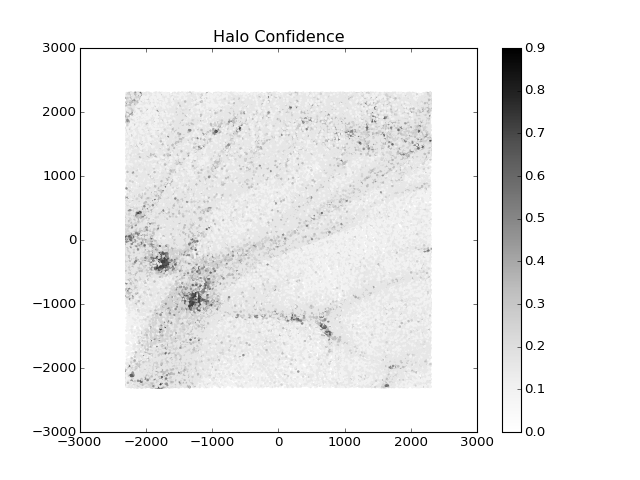

In [618]:
plt.figure()
#v = pb.plot.hist2d(s[f].d['y'], s[f].d['z'])
v = 2
plt.scatter(s[f].d['y'], s[f].d['z'], edgecolor="None", c=rf_predprob[:,v], marker='.', vmin=0, vmax=0.9)
plt.colorbar()
plt.set_cmap("Greys")
plt.title('Halo Confidence')

<IPython.core.display.Javascript object>


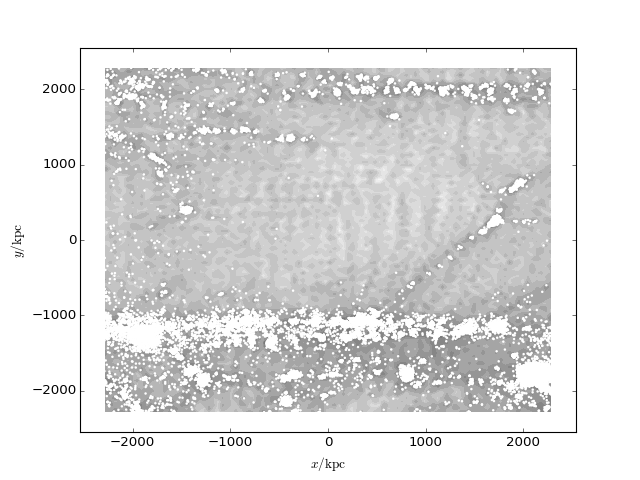

In [601]:
plt.figure()
v = pb.plot.hist2d(s[f].d['x'], s[f].d['y'])
v = 2
plt.scatter(s[f].d['x'][rf_preds == v], s[f].d['y'][rf_preds == v], edgecolor="None", c='w', marker='.')

<IPython.core.display.Javascript object>


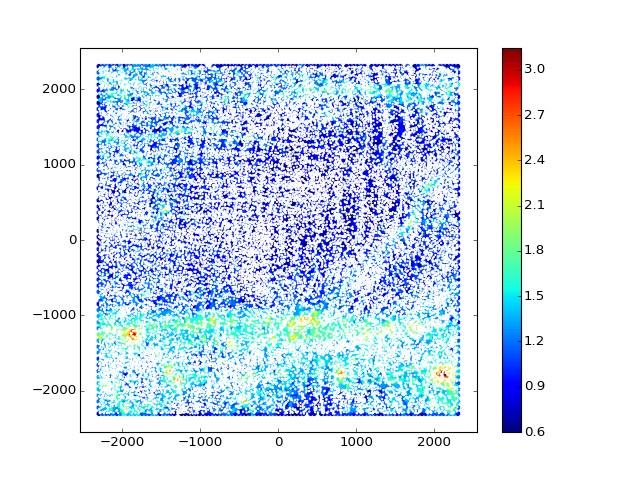

In [202]:
plt.figure()
v = plt.hexbin(s[f].d['x'], s[f].d['y'], bins = 'log', mincnt = 3)
plt.colorbar()
plt.scatter(s[f].d['x'][rf_preds == 0], s[f].d['y'][rf_preds == 0], edgecolor="None", c='w',s = 4)

In [548]:
overdensity = np.array(features[:,0]/np.mean(s[f]['rho']))

<IPython.core.display.Javascript object>


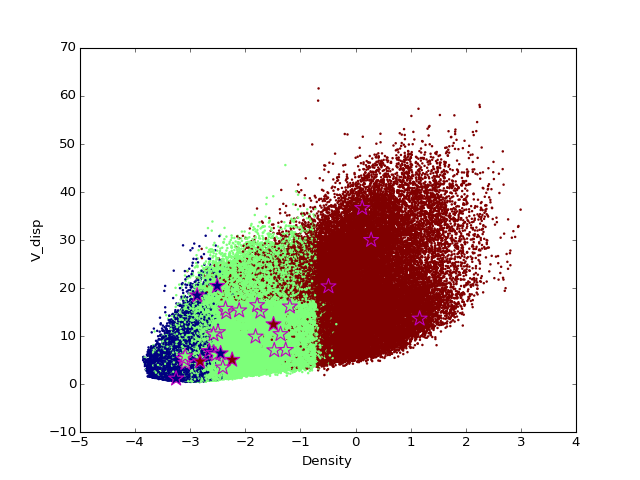

In [602]:
plt.figure()
plt.xlabel('Density')
plt.ylabel('V_disp')
classes = ["Void","Filaments","Halo"]
plt.set_cmap('jet')
plt.scatter(np.log10(overdensity), features[:,1], marker='.', edgecolor='none', c=rf_preds)
plt.scatter(np.log10(overdensity[train_ind]), np.array(features[:,1])[train_ind], marker='*', edgecolor='m', c=train_class, s=200)

Results from clustering positional data:

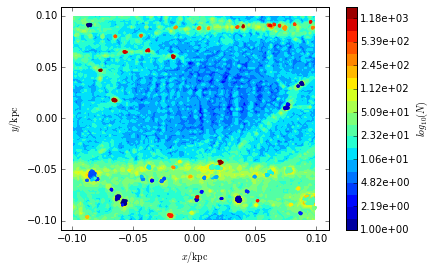

In [36]:
pb.plot.hist2d(s[f].d['x'], s[f].d['y'], colorbar=True)
plt.scatter(sub[nobkd,0], sub[nobkd,1], s=8, edgecolor='none' , c=labels[nobkd])